In [41]:
#Read the dataset into a Pandas DataFrame!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB



df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv")
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
#The dataset columns are not labeled but they are ordered in the following manner:
#'sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'

columns_name = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df.columns = columns_name



#encoding

df['class'] = LabelEncoder().fit_transform(df['class'].values)

df

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [43]:
#Split Data
#Create a validation dataset by splitting the loaded data into the following:
#80% training data for preparing the models (X_train and Y_train)
#20% as validation held back data from the models (X_test and Y_test)
#The number of x_columns for this problem is four as we have four different features in our data. Set the random_state to 7.

y = df["class"].values
X = df[df.columns.difference(['class'])].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)


# LogisticRegression(solver='liblinear', multi_class='ovr')

In [44]:
lr_model = LogisticRegression(solver='liblinear', multi_class='ovr',random_state=0).fit(X_train, y_train)


lr_pred= lr_model.predict(X_test)
print("KNN final accuracy score :",lr_model.score(X_test, y_test))


#print the confusion matrix.
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

KNN final accuracy score : 0.9
KNN Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]


# K Neighbors Classifier model.

best value of k is: 3
KNN final accuracy score : 0.9333333333333333
KNN Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]


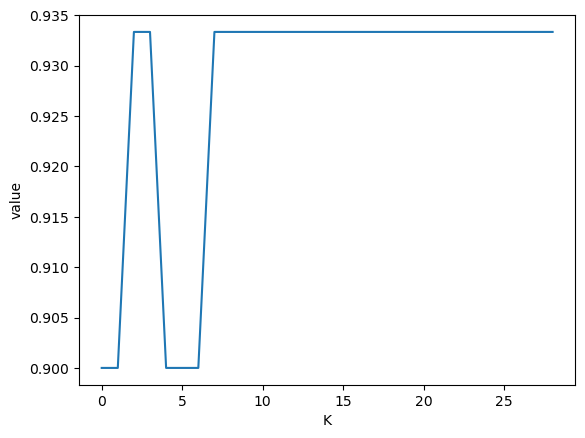

In [45]:
knn_accuracy = []


for k in range(1,30):
    model_temp1 = KNeighborsClassifier(n_neighbors=k,weights='distance',p=1).fit(X_train, y_train)
    knn_accuracy.append(model_temp1.score(X_test, y_test))
    


plt.plot(knn_accuracy)
plt.xlabel('K')
plt.ylabel('value')


best_k_value = knn_accuracy.index(max(accuracy))+1
print("best value of k is:",best_k_value)


knn_model =  KNeighborsClassifier(n_neighbors=best_k_value,weights='distance',p=1).fit(X_train, y_train)
knn_pred= knn_model.predict(X_test)
print("KNN final accuracy score :",knn_model.score(X_test, y_test))


#print the confusion matrix.
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))

# Decision Tree Classifier.

In [50]:
dtc_accuracy_score = []

#criterion_options = ['entropy','gini','log_loss']
#for i in range(len(criterion_options)):
 #   model_temp2 = DecisionTreeClassifier(criterion=criterion_options[i],random_state=0).fit(X_train,y_train)
 #   dtc_accuracy_score.append(model_temp2.score(X_test, y_test))
    
    
#print("all accuracy score :",dtc_accuracy_score)    


dtc_model = DecisionTreeClassifier(criterion='entropy',random_state=0).fit(X_train,y_train)
dtc_pred= dtc_model.predict(X_test)


print("final accuracy score :",dtc_model.score(X_test, y_test))

print("Confusion Matrix:")
print(confusion_matrix(y_test, dtc_pred))

final accuracy score : 0.9333333333333333
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]


# Random Forest Classifier.

In [47]:
rfc_accuracy_score = []

for i in range(1,4):
    model_temp4 = RandomForestClassifier(criterion='entropy',random_state=0,n_estimators = i*100).fit(X_train, y_train)
    rfc_accuracy_score.append(model_temp4.score(X_test, y_test))
    

best_n_estimator = (rfc_accuracy_score.index(max(rfc_accuracy_score))+1)*100
print("best value of n is:",best_n_estimator)


rfc_model = RandomForestClassifier(criterion= 'entropy',random_state=1, n_estimators = best_n_estimator).fit(X_train,y_train)

rfc_pred= rfc_model.predict(X_test)
 
print("final accuracy score :",rfc_model.score(X_test, y_test))

print("Confusion Matrix:")
print(confusion_matrix(y_test, rfc_pred))

best value of n is: 100
final accuracy score : 0.9333333333333333
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]


# Support Vector Machines.

In [48]:
SVC_accuracy=[]

for c in range(1,5):
    model_temp5 = SVC(kernel = "linear", C= c, gamma = "auto", random_state = 0).fit(X_train, y_train)
    SVC_accuracy.append(model_temp5.score(X_test, y_test))
    
best_c_value = SVC_accuracy.index(max(SVC_accuracy))+1
print("best value of c is:",best_c_value)    
    
    
svc_model = SVC(kernel = "linear", C= best_c_value, gamma = "auto", random_state = 0).fit(X_train,y_train)

    
print("SVC_accuracy:",svc_model.score(X_test,y_test))
    
svc_pred = svc_model.predict(X_test)


print("SVC Confusion Matrix:")
print(confusion_matrix(y_test, svc_pred))

best value of c is: 2
SVC_accuracy: 0.9666666666666667
SVC Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]


# Gaussian Naive Bayes Classifier.

In [49]:

gnb_model = GaussianNB()

print("SVC_accuracy:",gnb_model.score(X_test,y_test))
    
gnb_pred = gnb_model.predict(X_test)
print("SVC Confusion Matrix:")
print(confusion_matrix(y_test, gnb_pred)) 


SVC_accuracy: 0.9666666666666667
SVC Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]


In [71]:
#Place the models in a list. Iterate over the array of created models and train them using the training data split in step 2.
#Compare Accuracy and Plot


classifiers = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]

trained_models = {}
accuracy = {}


for item in classifiers:
    model_temp = item.fit(X_train,y_train)
    trained_models['model_'+str(item)] = model_temp
    accuracy['accuracy of '+str(item)] =  model_temp.score(X_test,y_test)

print("accuracy : " , accuracy)

accuracy :  {'accuracy of LogisticRegression()': 0.9666666666666667, 'accuracy of KNeighborsClassifier()': 0.9333333333333333, 'accuracy of SVC()': 0.9333333333333333, 'accuracy of DecisionTreeClassifier()': 0.9333333333333333, 'accuracy of RandomForestClassifier()': 0.9333333333333333, 'accuracy of GaussianNB()': 0.9666666666666667}


Text(0, 0.5, 'accuracy')

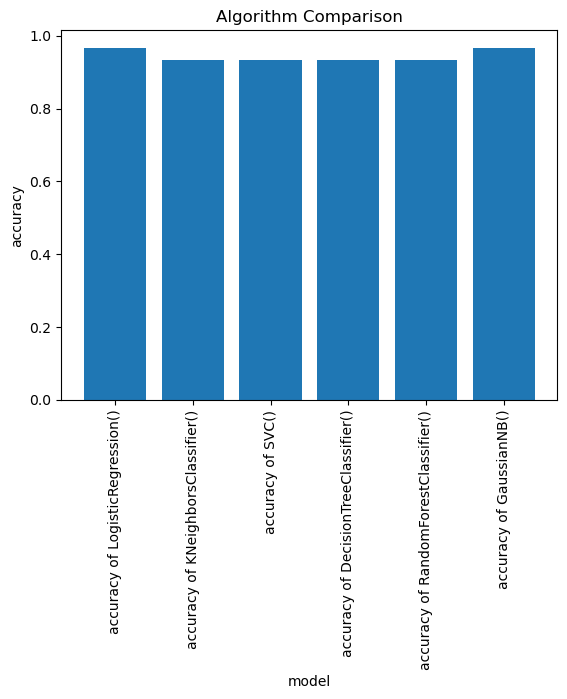

In [73]:
#Calculate and print the accuracy of each of the models and plot the difference in a matplotlib figure titled “Algorithm Comparison”


plt.bar(accuracy.keys(),accuracy.values())
plt.title("Algorithm Comparison")
plt.xlabel('model')
plt.xticks(rotation=90)
plt.ylabel('accuracy')

